In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# You can find the link to the data here
# ---> https://www.sheffield.ac.uk/mash/statistics/datasets

url = r'C:\Users\Anthony\Downloads\Birthweight_reduced_kg_R.csv'
df = pd.read_csv(url)

In [8]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


[Text(0.5, 0, 'Baby Index'), Text(0, 0.5, 'Baby Length')]

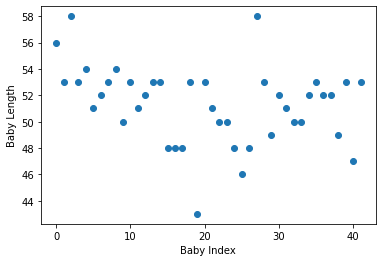

In [9]:
fig, ax = plt.subplots()
ax.scatter(x=df.index, y=df['Length'])
ax.set(xlabel='Baby Index', ylabel='Baby Length')

In [5]:
#df['Length'].min()
#df['Length'].max()
#df['Length'].mean()
#df['Length'].median()

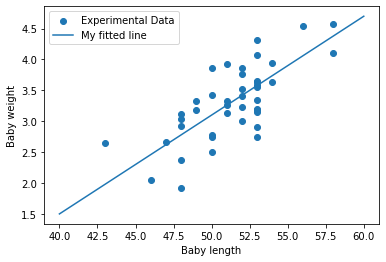

In [18]:
fig, ax = plt.subplots()
ax.scatter(x=df['Length'], y=df['Birthweight'], label='Experimental Data')
ax.set(xlabel='Baby length', ylabel='Baby weight')

# My "fake" attempt at fitting the data without using a computer solver
x = np.linspace(40, 60, 100)
m = 0.16
b = -4.9
y = m * x + b
ax.plot(x, y, label='My fitted line')
ax.legend()

In [25]:
# This grabs the two columns we care about (x, y data)
df_sub = df[['Length', 'Birthweight']]
df_sub.head()

,Length,Birthweight
0,56,4.55
1,53,4.32
2,58,4.10
3,53,4.07
4,54,3.94


C:\Users\Anthony\AppData\Local\Temp/ipykernel_21100/557635839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Prediction'] = m * df_sub['Length'] + b


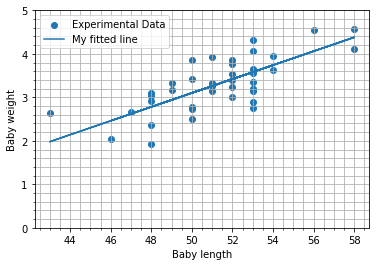

In [41]:
# This calculates the babyweight based on the baby length.
# We just have to make sure we specify a slope and intercept
# def predict_babyweight(x, m, b):
#     y = m * x + b
#     return y

m = 0.16
b = -4.9
df_sub['Prediction'] = m * df_sub['Length'] + b
df_sub

fig, ax = plt.subplots()
ax.scatter(x=df_sub['Length'], y=df_sub['Birthweight'], label='Experimental Data')
ax.plot(df_sub['Length'], df_sub['Prediction'], label='My fitted line')
ax.set(xlabel='Baby length', ylabel='Baby weight')
ax.minorticks_on()
ax.grid(which='major', axis='both')
ax.grid(which='minor', axis='both')
ax.set(ylim=(0,5))
ax.legend()

In [37]:
df_sub.head()

,Length,Birthweight,Prediction
0,56,4.55,4.06
1,53,4.32,3.58
2,58,4.10,4.38
3,53,4.07,3.58
4,54,3.94,3.74


In [49]:
df_sub['error'] = abs(df_sub['Birthweight'] - df_sub['Prediction'])
df_sub.head()

C:\Users\Anthony\AppData\Local\Temp/ipykernel_21100/1970354868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['error'] = abs(df_sub['Birthweight'] - df_sub['Prediction'])


,Length,Birthweight,Prediction,error
0,56,4.55,4.06,0.49
1,53,4.32,3.58,0.74
2,58,4.10,4.38,0.28
3,53,4.07,3.58,0.49
4,54,3.94,3.74,0.20


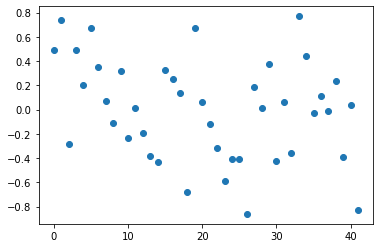

In [48]:
fig, ax = plt.subplots()
ax.scatter(x=df_sub.index, y=df_sub['error'])